# Task 1 Apply LabelEncoder, OneHotEncoder, and OrdinalEncoder to a sample dataset and compare the resulting feature space dimensions.


In [91]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [71]:
sample_data=({'color':['red','green','blue','green']})
df=pd.DataFrame(sample_data)

In [72]:
df

,color
0,red
1,green
2,blue
3,green


In [73]:
OE=OrdinalEncoder()
df['Ordinal_encoder']=OE.fit_transform(df[['color']])


In [74]:
df['Ordinal_encoder']

0    2.0
1    1.0
2    0.0
3    1.0
Name: Ordinal_encoder, dtype: float64

In [75]:
LE=LabelEncoder()
df['Label_encoder']=LE.fit_transform(df['color'])

In [76]:
df['Label_encoder']

0    2
1    1
2    0
3    1
Name: Label_encoder, dtype: int64

In [85]:
OHE=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
dff = pd.get_dummies(df, columns=['color'])
df=pd.concat([df,dff],axis=1)
# OHE = OneHotEncoder(sparse=False)
# dff = OHE.fit_transform(df[['color']])

# Task 2 Apply both StandardScaler and MinMaxScaler on any numerical dataset and visualize the difference using boxplots. 

In [83]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

In [95]:
df=pd.DataFrame(sns.load_dataset('titanic'))
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [98]:
ss=StandardScaler()
df['Age_StandardScaler']=ss.fit_transform(df[['age']])

In [100]:
mm=MinMaxScaler()
df['MinMaxScaler']=mm.fit_transform(df[['age']])

In [105]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,Age_StandardScaler,MinMaxScaler
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,7.140000e+02,714.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.388379e-16,0.367921
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.000701e+00,0.182540
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-2.016979e+00,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,-6.595416e-01,0.247612
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,-1.170488e-01,0.346569
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,5.718310e-01,0.472229
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.465126e+00,1.000000


<Axes: ylabel='Age_StandardScaler'>

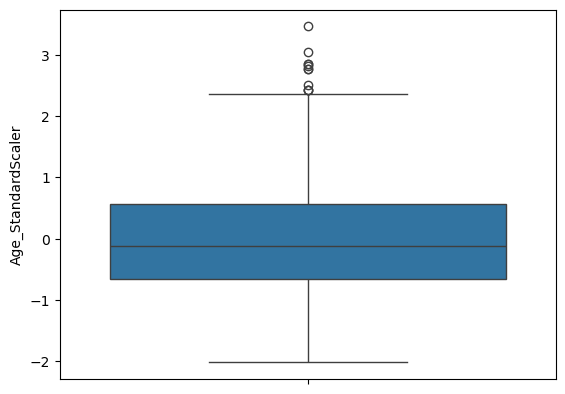

In [106]:
sns.boxplot(df['Age_StandardScaler'])

<Axes: ylabel='MinMaxScaler'>

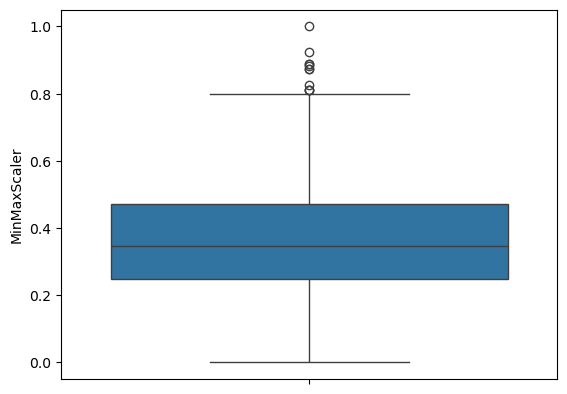

In [107]:
sns.boxplot(df['MinMaxScaler'])

# Task 3 Create equal-width and equal-frequency bins for an “Age” column in a dataset and visualize using histograms. 

In [118]:
df['age_equal_width']=pd.cut(df['age'],bins=3,labels=['young','adult','old'])
df['age_equal_frequency']=pd.qcut(df['age'],q=3,labels=['young','adult','old'])

<Axes: xlabel='age_equal_width', ylabel='Count'>

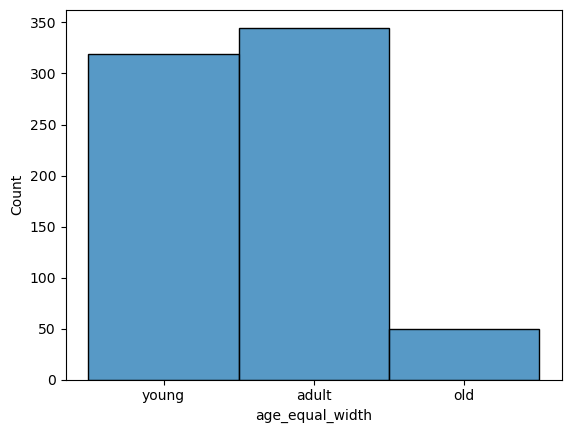

In [119]:
sns.histplot(df['age_equal_width'])

<Axes: xlabel='age_equal_frequency', ylabel='Count'>

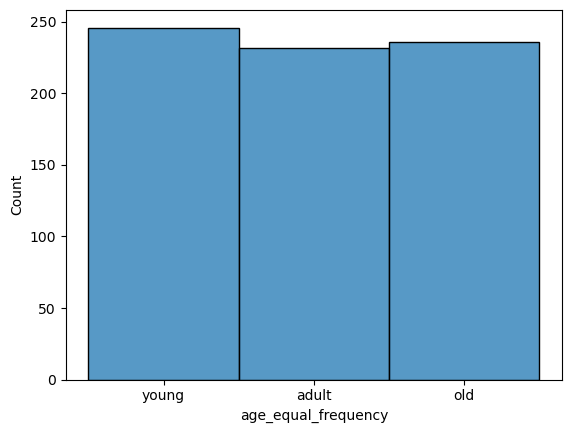

In [120]:
sns.histplot(df['age_equal_frequency'])

# Task 4 Create custom bins for a “Salary” column — for example: Low (<30K), Medium (30K–70K), High (>70K) — and encode them using OrdinalEncoder. 

In [122]:
custom=[0,20,40,60]
df['age_custom']=pd.cut(df['age'],bins=custom,labels=['young','adult','old'])


<Axes: xlabel='age_custom', ylabel='Count'>

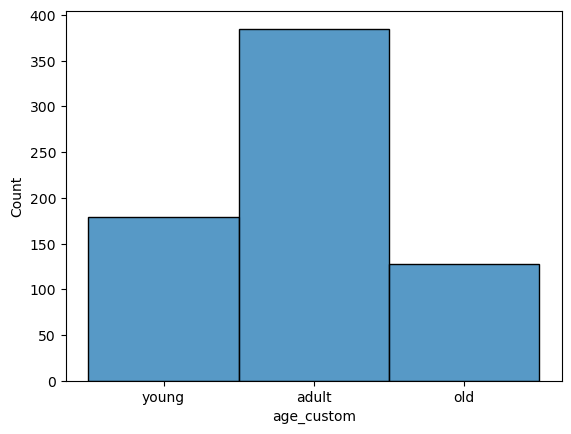

In [123]:
sns.histplot(df['age_custom'])

In [124]:
OE=OrdinalEncoder()
df['age_custom']=OE.fit_transform(df[['age_custom']])


In [126]:
df['age_custom'].isna().sum()

np.int64(199)